In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
from IPython.display import display, clear_output
import time


Bad key text.latex.preview in file C:\Users\mcdon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\mcdon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\mcdon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

KeyboardInterrupt: 

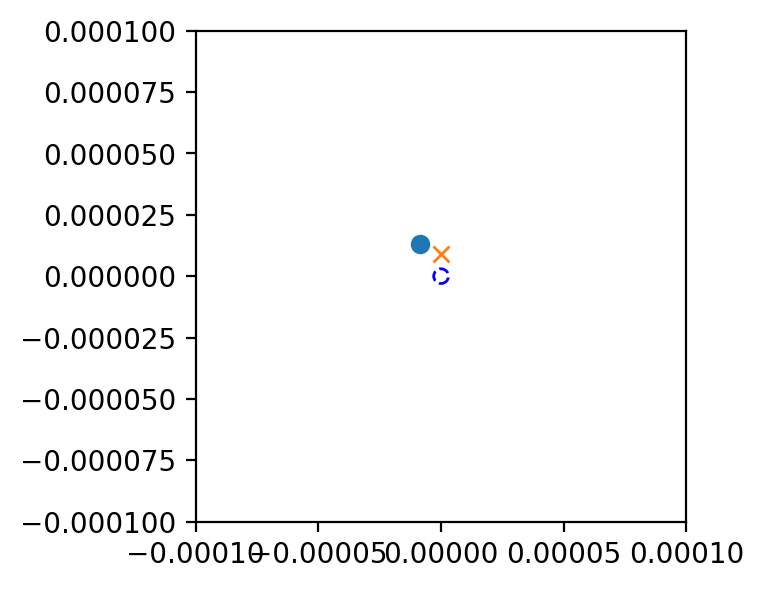

In [8]:
#Based on "Vector Field UAV Guidance for Path Following and Obstacle Avoidance with Minimal Deviation", Jay P. Wilhelm and Garrett Clem.

folder = 'CollisionAvoidance'
filename = 'CollisionAvoidance'

length = 0.0002
radius = 3E-6#0.2
little_r = 0 
k_far = 3.0*3
big_R = k_far*radius
Gpath = 1
Hpath = 0
Gobstacle = -10
Hobstacle = 1
#start = np.array([0,-1])  #initial position of particle
start = np.array([0.00000,-0.00004])
#target = np.array([0,0.5]) #target
target = np.array([0.00000,3*radius])
obstacle = np.array([0.0,0.0])
v0 = 1E-6*20

def guidance_vector(position,target,obstacle): #the position of the stakeholder and the point it is trying to reach and the location of the obstacle
    x = position[0]/length-target[0]/length #shift coordinate frame so target is the origin, and scale by length
    y = position[1]/length-target[1]/length
    xc = obstacle[0]/length - target[0]/length 
    yc = obstacle[1]/length - target[1]/length
    xbar = x-xc
    ybar = y-yc
    d = np.sqrt(xbar**2+ybar**2)
    P = 1-np.tanh(2*np.pi*d/(big_R/length)-np.pi)
    delta = np.arctan2(y,x)
    Vcirc = np.array([np.sin(delta),-np.cos(delta)])
    Vconv = -1/np.sqrt((np.cos(delta)*x+np.sin(delta)*y)**2)*np.array([x*np.cos(delta)**2+np.cos(delta)*np.sin(delta)*y,y*np.sin(delta)**2+np.cos(delta)*np.sin(delta)*x])
    Vpath = Gpath*Vconv + Hpath*Vcirc
    Voconv = -1/np.sqrt(xbar**4+ybar**4+2*xbar**2*ybar**2-2*little_r**2*xbar**2-2*little_r**2*ybar**2+little_r**2)*np.array([2*xbar**3+2*xbar*ybar**2-2*little_r**2*xbar,2*ybar**3+2*xbar**2*ybar-2*little_r**2*ybar])
    Vocirc = np.array([2*(y-yc),2*(xc-x)])
    Vobstacle = Gobstacle*Voconv+Hobstacle*Vocirc
    Vg = Vpath+P*Vobstacle
    velocity = v0*Vg
    return velocity/np.linalg.norm(velocity)*v0    

lower = -0.0001
higher = 0.0001
def plotter(i):
    plt.figure(figsize=(3.25, 3.25), dpi= 200, facecolor='w', edgecolor='k')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(x[i],y[i],'o')
    #plt.plot(obstacle[0]+target[0],obstacle[1]+target[1],'x')
    plt.plot(target[0],target[1],'x')
    #plt.gca().add_patch(patches.Circle((xc+target[0], yc+target[1]), R, linestyle = '--', color='r',fill=False, lw = 1))
    plt.gca().add_patch(patches.Circle((obstacle[0], obstacle[1]), radius, linestyle = '--', color='b',fill=False, lw = 1))
    plt.gca().set_xlim([lower,higher])
    plt.gca().set_ylim([lower,higher])
    clear_output(wait=True)
    display(plt.gcf())
    kfilled = str(i).zfill(5)
    #plt.savefig(f"{folder}/{filename}Plot{kfilled}.png",bbox_inches="tight") 
    plt.close()

t = np.linspace(0,10,101)
delta_t = t[1]-t[0]
x = np.zeros(len(t))
y = np.zeros(len(t))
x[0] = start[0]
y[0] = start[1]
vx = np.zeros(len(t))
vy = np.zeros(len(t))
vx[0],vy[0] = guidance_vector(np.array([x[0],y[0]]),target,obstacle)
for i in range(1,len(t)):
    x[i] = x[i-1]+vx[i-1]*delta_t
    y[i] = y[i-1]+vy[i-1]*delta_t
    vx[i],vy[i] = guidance_vector(np.array([x[i],y[i]]),target,obstacle)
    plotter(i)
    time.sleep(0.2)
#speed is 1 m/s

C:\Users\mcdon\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\mcdon\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


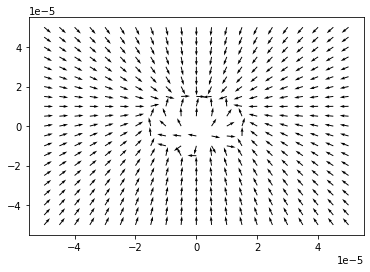

In [9]:
xx = np.linspace(.5*lower,.5*higher,21)
yy = xx.copy()
X,Y = np.meshgrid(xx,yy)
Vx = X.copy()*0
Vy = X.copy()*0
for i in range(len(xx)):
    for j in range(len(yy)):
        Vx[i,j],Vy[i,j] = guidance_vector(np.array([X[i,j],Y[i,j]]),target,obstacle)#should this be j,i?
plt.quiver(X,Y,Vx,Vy)

In [204]:
start = np.array([0.000000,-0.000005])
start = np.array([0.000000,-0.00000001])
x,y = start/length
x = x-target[0]/length
y = y-target[1]/length
xbar = x-xc/length
ybar = y-yc/length
d = np.sqrt(xbar**2+ybar**2)
P = 1-np.tanh(2*np.pi*d/(R/length)-np.pi)
delta = np.arctan2(y,x)
Vcirc = np.array([np.sin(delta),-np.cos(delta)])
Vconv = -1/np.sqrt((np.cos(delta)*x+np.sin(delta)*y)**2)*np.array([x*np.cos(delta)**2+np.cos(delta)*np.sin(delta)*y,y*np.sin(delta)**2+np.cos(delta)*np.sin(delta)*x])
Vpath = Gpath*Vconv + Hpath*Vcirc
Voconv = -1/np.sqrt(xbar**4+ybar**4+2*xbar**2*ybar**2-2*r**2*xbar**2-2*r**2*ybar**2+r**2)*np.array([2*xbar**3+2*xbar*ybar**2-2*r**2*xbar,2*ybar**3+2*xbar**2*ybar-2*r**2*ybar])
Vocirc = np.array([2*(y-yc),2*(xc-x)])
Vobstacle = Gobstacle*Voconv+Hobstacle*Vocirc
Vg = Vpath+P*Vobstacle
velocity = v0*Vg
print(Vconv)
print(-Voconv)
print(P)
print(velocity/v0)
#why does Voconv get smaller as you get closer?

[-6.123234e-17  1.000000e+00]
[ 0.     -0.0002]
1.9962590649564023
[ 0.         -0.00039925]


In [23]:
print(delta_t)

0.01
